<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Covid Vaccination Prediction</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load and Prepare Data

In [3]:
df_vaccinations = pd.read_csv('country_vaccinations.csv')

In [4]:
df_manufacturer = pd.read_csv('country_vaccinations_by_manufacturer.csv')

In [5]:
df_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [6]:
df_manufacturer.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


## EDA

In [7]:
df_vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [8]:
df_manufacturer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9157 non-null   object
 1   date                9157 non-null   object
 2   vaccine             9157 non-null   object
 3   total_vaccinations  9157 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 286.3+ KB


In [9]:
df_vaccinations.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [10]:
df_manufacturer.describe()

,total_vaccinations
count,9.157000e+03
mean,6.024868e+06
std,2.115246e+07
min,0.000000e+00
25%,4.064400e+04
50%,3.388750e+05
75%,2.293498e+06
max,1.865092e+08


In [11]:
df_vaccinations.shape

(31240, 15)

In [12]:
df_manufacturer.shape

(9157, 4)

In [13]:
df_vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [14]:
df_manufacturer.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')

In [15]:
df_vaccinations.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [16]:
df_manufacturer.dtypes

location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object

### Explanation of Columns for Each Dataset

* df_vaccinations --> country_vaccinations.csv
1. **country**: The name of the country where the vaccination data was recorded.
2. **iso_code**: The three-letter country code following the ISO 3166-1 alpha-3 standard.
3. **date**: The date when the vaccination data was collected.
4. **total_vaccinations**: The total number of vaccine doses administered up to the specified date.
5. **people_vaccinated**: The number of individuals who have received at least one dose of a vaccine.
6. **people_fully_vaccinated**: The number of individuals who have completed the vaccination regimen (e.g., received both doses if applicable).
7. **daily_vaccinations_raw**: The raw count of vaccine doses administered on a specific day.
8. **daily_vaccinations**: The rolling average of daily vaccine doses administered, calculated over the last few days.
9. **total_vaccinations_per_hundred**: The total number of vaccine doses administered per 100 people in the population.
10. **people_vaccinated_per_hundred**: The number of people vaccinated with at least one dose per 100 people in the population.
11. **people_fully_vaccinated_per_hundred**: The number of people fully vaccinated per 100 people in the population.
12. **daily_vaccinations_per_million**: The daily number of vaccine doses administered per million people.
13. **vaccines**: The vaccines in use in the country (e.g., Pfizer/BioNTech, Moderna).
14. **source_name**: The name of the organization or entity providing the data.
15. **source_website**: The URL for the source of the data.

* df_manufacturer --> country_vaccinations_by_manufacturer.csv
1. **location**: The name of the country or region where the vaccination data was recorded.
2. **date**: The date when the vaccination data was collected.
3. **vaccine**: The type of vaccine administered (e.g., Johnson&Johnson, Moderna, Pfizer/BioNTech).
4. **total_vaccinations**: The cumulative number of vaccinations administered for each vaccine type up to the specified date.

#### Drop Unused Columns

In [17]:
columns_to_drop = ['source_name', 'source_website', 'iso_code']
df_vaccinations = df_vaccinations.drop(columns=columns_to_drop)
df_vaccinations.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


## Data Preprocessing

In [18]:
# Rename columns in df_manufacturer to match the final DataFrame structure
df_manufacturer = df_manufacturer.rename(columns={
    'location': 'country',
    'vaccine': 'vaccines'
})
df_manufacturer.head()

,country,date,vaccines,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


In [19]:
# Perform the join based on 'country' and 'date' columns only
df = pd.merge(df_vaccinations, df_manufacturer, on=['country', 'date'], how='outer')
df.head()

,country,date,total_vaccinations_x,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines_x,vaccines_y,total_vaccinations_y
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",NaN,NaN


In [20]:
df.shape

(37440, 14)

In [21]:
df.columns

Index(['country', 'date', 'total_vaccinations_x', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'vaccines_x', 'vaccines_y',
       'total_vaccinations_y'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              37440 non-null  object 
 1   date                                 37440 non-null  object 
 2   total_vaccinations_x                 22872 non-null  float64
 3   people_vaccinated                    21987 non-null  float64
 4   people_fully_vaccinated              19133 non-null  float64
 5   daily_vaccinations_raw               19606 non-null  float64
 6   daily_vaccinations                   37081 non-null  float64
 7   total_vaccinations_per_hundred       22872 non-null  float64
 8   people_vaccinated_per_hundred        21987 non-null  float64
 9   people_fully_vaccinated_per_hundred  19133 non-null  float64
 10  daily_vaccinations_per_million       37081 non-null  float64
 11  vaccines_x                  

In [23]:
df.isnull().sum()

country                                    0
date                                       0
total_vaccinations_x                   14568
people_vaccinated                      15453
people_fully_vaccinated                18307
daily_vaccinations_raw                 17834
daily_vaccinations                       359
total_vaccinations_per_hundred         14568
people_vaccinated_per_hundred          15453
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million           359
vaccines_x                                33
vaccines_y                             28283
total_vaccinations_y                   28283
dtype: int64

In [24]:
# Combine 'total_vaccinations_x' and 'total_vaccinations_y' into a single column
# Fill missing values in one column with the values from the other
df['total_vaccinations'] = df['total_vaccinations_x'].fillna(df['total_vaccinations_y'])

# Drop the original columns as they are now combined
df = df.drop(columns=['total_vaccinations_x', 'total_vaccinations_y'])

In [25]:
df.isnull().sum()

country                                    0
date                                       0
people_vaccinated                      15453
people_fully_vaccinated                18307
daily_vaccinations_raw                 17834
daily_vaccinations                       359
total_vaccinations_per_hundred         14568
people_vaccinated_per_hundred          15453
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million           359
vaccines_x                                33
vaccines_y                             28283
total_vaccinations                     13512
dtype: int64

In [26]:
# List of unique vaccines to create columns
vaccine_types = [
    'Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca', 
    'Pfizer/BioNTech', 'Sinovac', 'CanSino', 
    'Sputnik V', 'Sinopharm/Beijing'
]

# Initialize new columns with zeros
for vaccine in vaccine_types:
    df[vaccine] = 0

# Update columns based on 'vaccines' column
for index, row in df.iterrows():
    if pd.notna(row['vaccines_x']):
        for vaccine in vaccine_types:
            if vaccine in row['vaccines_x']:
                df.at[index, vaccine] = 1

# Update columns based on 'vaccine' column
for index, row in df.iterrows():
    if pd.notna(row['vaccines_y']):
        if row['vaccines_y'] in vaccine_types:
            df.at[index, row['vaccines_y']] = 1

In [27]:
df = df.drop(columns=['vaccines_x', 'vaccines_y'])

In [28]:
df.shape

(37440, 19)

In [29]:
df.head()

,country,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,total_vaccinations,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinovac,CanSino,Sputnik V,Sinopharm/Beijing
0,Afghanistan,2021-02-22,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1,0,1,1,0,0,0,1
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,1,0,1,1,0,0,0,1
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,1,0,1,1,0,0,0,1
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,1,0,1,1,0,0,0,1
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,1,0,1,1,0,0,0,1


In [30]:
df.isnull().sum()

country                                    0
date                                       0
people_vaccinated                      15453
people_fully_vaccinated                18307
daily_vaccinations_raw                 17834
daily_vaccinations                       359
total_vaccinations_per_hundred         14568
people_vaccinated_per_hundred          15453
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million           359
total_vaccinations                     13512
Johnson&Johnson                            0
Moderna                                    0
Oxford/AstraZeneca                         0
Pfizer/BioNTech                            0
Sinovac                                    0
CanSino                                    0
Sputnik V                                  0
Sinopharm/Beijing                          0
dtype: int64

In [31]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month and day into separate columns
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original 'date' column as it's no longer needed
df = df.drop(columns=['date'])

In [32]:
df.isnull().sum()

country                                    0
people_vaccinated                      15453
people_fully_vaccinated                18307
daily_vaccinations_raw                 17834
daily_vaccinations                       359
total_vaccinations_per_hundred         14568
people_vaccinated_per_hundred          15453
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million           359
total_vaccinations                     13512
Johnson&Johnson                            0
Moderna                                    0
Oxford/AstraZeneca                         0
Pfizer/BioNTech                            0
Sinovac                                    0
CanSino                                    0
Sputnik V                                  0
Sinopharm/Beijing                          0
month                                      0
day                                        0
dtype: int64

In [33]:
# Drop the 'daily_vaccinations_raw' column as it's redundant
df = df.drop(columns=['daily_vaccinations_raw'])

In [34]:
df.shape

(37440, 19)

In [35]:
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(method='ffill')

In [36]:
df.isnull().sum()

country                                    0
people_vaccinated                      15453
people_fully_vaccinated                18307
daily_vaccinations                         1
total_vaccinations_per_hundred         14568
people_vaccinated_per_hundred          15453
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million           359
total_vaccinations                     13512
Johnson&Johnson                            0
Moderna                                    0
Oxford/AstraZeneca                         0
Pfizer/BioNTech                            0
Sinovac                                    0
CanSino                                    0
Sputnik V                                  0
Sinopharm/Beijing                          0
month                                      0
day                                        0
dtype: int64

In [37]:
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(0)

In [38]:
df.isnull().sum()

country                                    0
people_vaccinated                      15453
people_fully_vaccinated                18307
daily_vaccinations                         0
total_vaccinations_per_hundred         14568
people_vaccinated_per_hundred          15453
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million           359
total_vaccinations                     13512
Johnson&Johnson                            0
Moderna                                    0
Oxford/AstraZeneca                         0
Pfizer/BioNTech                            0
Sinovac                                    0
CanSino                                    0
Sputnik V                                  0
Sinopharm/Beijing                          0
month                                      0
day                                        0
dtype: int64

In [39]:
# Filling missing values in 'total_vaccinations' based on the specified logic
for index in range(len(df)):
    if pd.isna(df.loc[index, 'total_vaccinations']):
        if index > 0 and df.loc[index, 'country'] == df.loc[index - 1, 'country']:
            df.loc[index, 'total_vaccinations'] = (
                df.loc[index - 1, 'total_vaccinations'] + df.loc[index, 'daily_vaccinations']
            )
        else:
            df.loc[index, 'total_vaccinations'] = df.loc[index, 'daily_vaccinations']

# Checking if there are any remaining missing values in 'total_vaccinations'
missing_values_total_vaccinations = df['total_vaccinations'].isnull().sum()
missing_values_total_vaccinations

0

In [40]:
# Filling missing values in 'people_vaccinated' based on the same logic
for index in range(len(df)):
    if pd.isna(df.loc[index, 'people_vaccinated']):
        if index > 0 and df.loc[index, 'country'] == df.loc[index - 1, 'country']:
            df.loc[index, 'people_vaccinated'] = (
                df.loc[index - 1, 'people_vaccinated'] + df.loc[index, 'daily_vaccinations']
            )
        else:
            df.loc[index, 'people_vaccinated'] = df.loc[index, 'daily_vaccinations']

# Checking if there are any remaining missing values in 'people_vaccinated'
missing_values_people_vaccinated = df['people_vaccinated'].isnull().sum()
missing_values_people_vaccinated

0

In [41]:
# Calculating population for each country based on the relationship between
# 'daily_vaccinations_per_million' and 'daily_vaccinations'

# Dictionary to store estimated population for each country
country_population = {}

# Iterating over each country
for country in df['country'].unique():
    # Filtering rows for the current country where both columns have values
    country_data = df[(df['country'] == country) & 
                      df['daily_vaccinations_per_million'].notna() & 
                      df['daily_vaccinations'].notna()]
    
    # If there are valid rows, calculate the population as the ratio
    if not country_data.empty:
        population_estimates = (
            country_data['daily_vaccinations'] * 1_000_000 /
            country_data['daily_vaccinations_per_million']
        )
        # Taking the mean population for more stable estimation
        country_population[country] = population_estimates.mean()

# Using the estimated populations to fill missing values in 'daily_vaccinations_per_million'
for index in range(len(df)):
    if pd.isna(df.loc[index, 'daily_vaccinations_per_million']):
        country = df.loc[index, 'country']
        if country in country_population:
            df.loc[index, 'daily_vaccinations_per_million'] = (
                df.loc[index, 'daily_vaccinations'] * 1_000_000 / country_population[country]
            )

# Checking if there are any remaining missing values in 'daily_vaccinations_per_million'
missing_values_daily_vacc_per_million = df['daily_vaccinations_per_million'].isnull().sum()
missing_values_daily_vacc_per_million

3

In [42]:
# Forward filling the remaining missing values in 'daily_vaccinations_per_million'
df['daily_vaccinations_per_million'] = df['daily_vaccinations_per_million'].fillna(method='ffill')

# Checking again to confirm all missing values are filled
missing_values_daily_vacc_per_million_final = df['daily_vaccinations_per_million'].isnull().sum()
missing_values_daily_vacc_per_million_final

0

In [43]:
df.isnull().sum()

country                                    0
people_vaccinated                          0
people_fully_vaccinated                18307
daily_vaccinations                         0
total_vaccinations_per_hundred         14568
people_vaccinated_per_hundred          15453
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million             0
total_vaccinations                         0
Johnson&Johnson                            0
Moderna                                    0
Oxford/AstraZeneca                         0
Pfizer/BioNTech                            0
Sinovac                                    0
CanSino                                    0
Sputnik V                                  0
Sinopharm/Beijing                          0
month                                      0
day                                        0
dtype: int64

In [44]:
# Filling missing values in 'total_vaccinations_per_hundred' using 'total_vaccinations' and estimated populations

# Using previously calculated population estimates
for index in range(len(df)):
    if pd.isna(df.loc[index, 'total_vaccinations_per_hundred']):
        country = df.loc[index, 'country']
        if country in country_population:
            df.loc[index, 'total_vaccinations_per_hundred'] = (
                df.loc[index, 'total_vaccinations'] * 100 / country_population[country]
            )

# Checking if there are any remaining missing values in 'total_vaccinations_per_hundred'
missing_values_total_vacc_per_hundred = df['total_vaccinations_per_hundred'].isnull().sum()
missing_values_total_vacc_per_hundred

5

In [45]:
# Forward filling the remaining missing values in 'total_vaccinations_per_hundred'
df['total_vaccinations_per_hundred'] = df['total_vaccinations_per_hundred'].fillna(method='ffill')

# Checking again to confirm all missing values are filled
missing_values_total_vacc_per_hundred_final = df['total_vaccinations_per_hundred'].isnull().sum()
missing_values_total_vacc_per_hundred_final

0

In [46]:
# Filling missing values in 'people_vaccinated_per_hundred' using 'people_vaccinated' and estimated populations

for index in range(len(df)):
    if pd.isna(df.loc[index, 'people_vaccinated_per_hundred']):
        country = df.loc[index, 'country']
        if country in country_population:
            df.loc[index, 'people_vaccinated_per_hundred'] = (
                df.loc[index, 'people_vaccinated'] * 100 / country_population[country]
            )

# Forward filling the remaining missing values
df['people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].fillna(method='ffill')

# Checking if there are any remaining missing values
missing_values_people_vacc_per_hundred_final = df['people_vaccinated_per_hundred'].isnull().sum()
missing_values_people_vacc_per_hundred_final

0

In [47]:
df.isnull().sum()

country                                    0
people_vaccinated                          0
people_fully_vaccinated                18307
daily_vaccinations                         0
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred              0
people_fully_vaccinated_per_hundred    18307
daily_vaccinations_per_million             0
total_vaccinations                         0
Johnson&Johnson                            0
Moderna                                    0
Oxford/AstraZeneca                         0
Pfizer/BioNTech                            0
Sinovac                                    0
CanSino                                    0
Sputnik V                                  0
Sinopharm/Beijing                          0
month                                      0
day                                        0
dtype: int64

In [48]:
# Calculating the ratio of fully vaccinated to vaccinated for available data
valid_ratios = df['people_fully_vaccinated'] / df['people_vaccinated']
average_ratio = valid_ratios.mean()  # Mean ratio for filling missing values

# Filling missing values in 'people_fully_vaccinated' while maintaining monotonicity
for index in range(len(df)):
    if pd.isna(df.loc[index, 'people_fully_vaccinated']):
        country = df.loc[index, 'country']
        if index > 0 and df.loc[index, 'country'] == df.loc[index - 1, 'country']:
            # Estimate based on the average ratio and ensure monotonicity
            estimated_value = df.loc[index, 'people_vaccinated'] * average_ratio
            previous_value = df.loc[index - 1, 'people_fully_vaccinated']
            df.loc[index, 'people_fully_vaccinated'] = max(estimated_value, previous_value)
        else:
            # If it's the first entry for a country, estimate normally
            df.loc[index, 'people_fully_vaccinated'] = (
                df.loc[index, 'people_vaccinated'] * average_ratio
            )

# Verifying if monotonicity is maintained for each country
monotonicity_violations = []

for country in df['country'].unique():
    country_data = df[df['country'] == country]['people_fully_vaccinated']
    if not (country_data.diff().dropna() >= 0).all():
        monotonicity_violations.append(country)

monotonicity_violations

['Afghanistan',
 'Albania',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guernsey',

In [49]:
# Ensuring monotonicity in 'people_fully_vaccinated' by replacing decreasing values with the previous value
for country in df['country'].unique():
    country_data = df[df['country'] == country]['people_fully_vaccinated']
    for index in country_data.index[1:]:  # Skip the first index
        if df.loc[index, 'people_fully_vaccinated'] < df.loc[index - 1, 'people_fully_vaccinated']:
            df.loc[index, 'people_fully_vaccinated'] = df.loc[index - 1, 'people_fully_vaccinated']

# Verifying monotonicity after the adjustment
monotonicity_violations_after_fix = []

for country in df['country'].unique():
    country_data = df[df['country'] == country]['people_fully_vaccinated']
    if not (country_data.diff().dropna() >= 0).all():
        monotonicity_violations_after_fix.append(country)

monotonicity_violations_after_fix

[]

In [51]:
# Filling missing values in 'people_fully_vaccinated_per_hundred' using 'people_fully_vaccinated' and population estimates

for index in range(len(df)):
    if pd.isna(df.loc[index, 'people_fully_vaccinated_per_hundred']):
        country = df.loc[index, 'country']
        if country in country_population:
            df.loc[index, 'people_fully_vaccinated_per_hundred'] = (
                df.loc[index, 'people_fully_vaccinated'] * 100 / country_population[country]
            )

# Checking if there are any remaining missing values in 'people_fully_vaccinated_per_hundred'
missing_values_people_fully_vacc_per_hundred_final = df['people_fully_vaccinated_per_hundred'].isnull().sum()
missing_values_people_fully_vacc_per_hundred_final

7

In [52]:
# Forward filling the remaining missing values in 'people_fully_vaccinated_per_hundred'
df['people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].fillna(method='ffill')

# Checking again to confirm all missing values are filled
missing_values_people_fully_vacc_per_hundred_final_check = df['people_fully_vaccinated_per_hundred'].isnull().sum()
missing_values_people_fully_vacc_per_hundred_final_check

0

In [53]:
df.isnull().sum()

country                                0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
total_vaccinations                     0
Johnson&Johnson                        0
Moderna                                0
Oxford/AstraZeneca                     0
Pfizer/BioNTech                        0
Sinovac                                0
CanSino                                0
Sputnik V                              0
Sinopharm/Beijing                      0
month                                  0
day                                    0
dtype: int64

## Strorytelling - Visualization

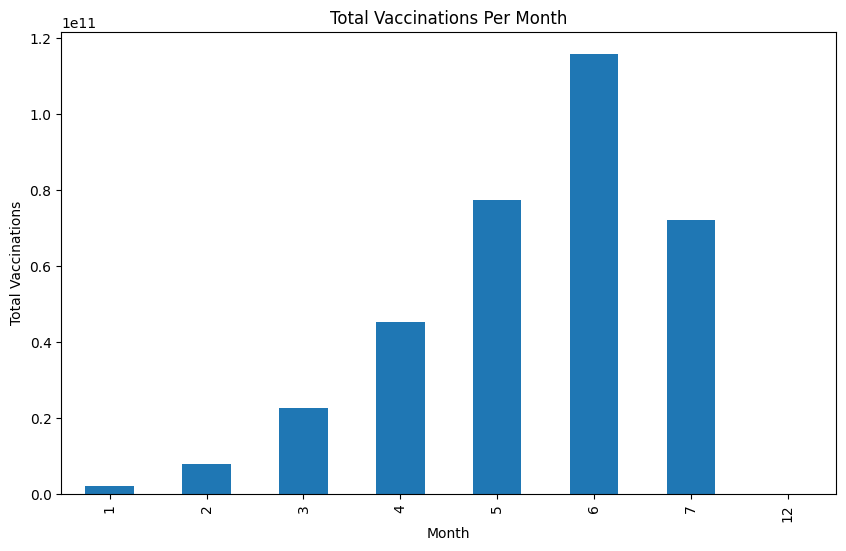

In [54]:
# Plot 1: Total vaccinations per month
plt.figure(figsize=(10, 6))
df.groupby('month')['total_vaccinations'].sum().plot(kind='bar')
plt.title('Total Vaccinations Per Month')
plt.xlabel('Month')
plt.ylabel('Total Vaccinations')
plt.show()

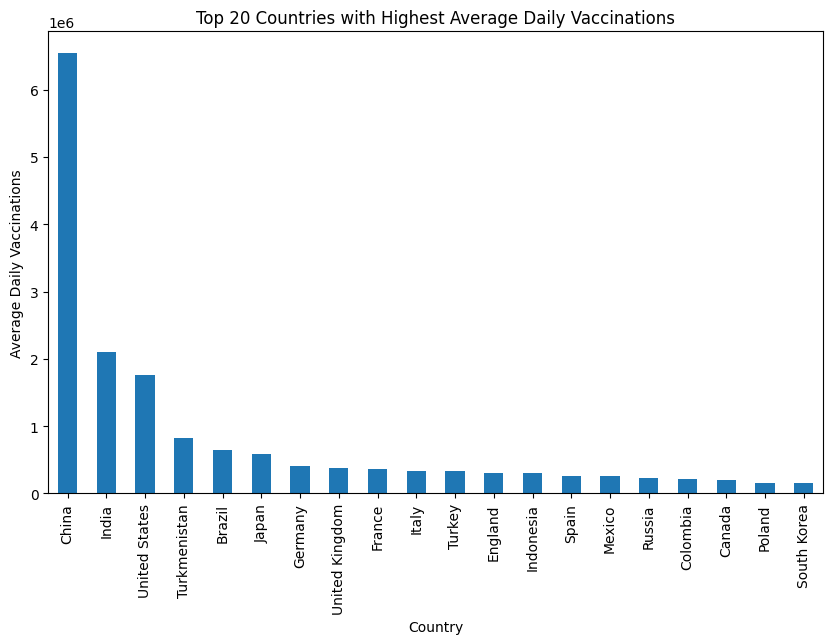

In [55]:
# Plot 2: Average daily vaccinations per country
plt.figure(figsize=(10, 6))
df.groupby('country')['daily_vaccinations'].mean().nlargest(20).plot(kind='bar')
plt.title('Top 20 Countries with Highest Average Daily Vaccinations')
plt.xlabel('Country')
plt.ylabel('Average Daily Vaccinations')
plt.show()

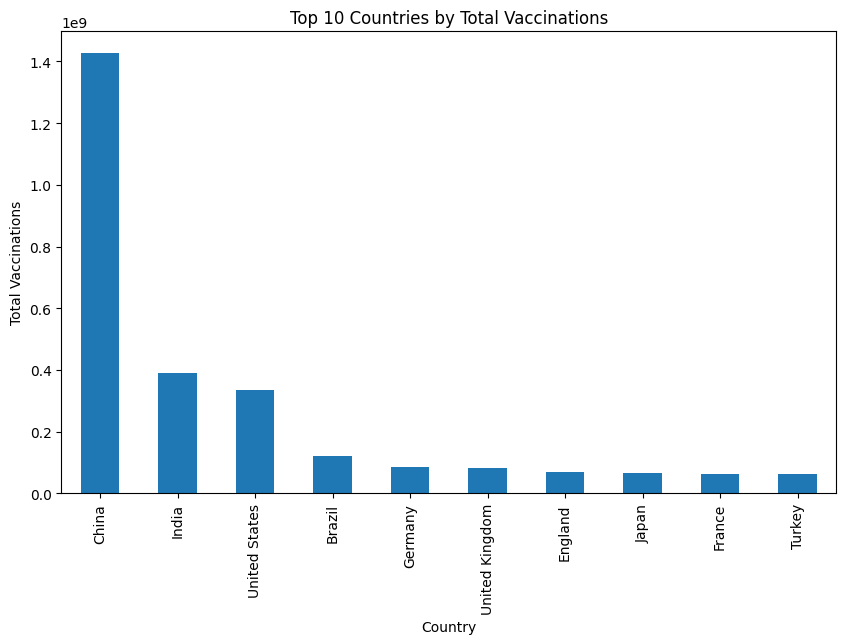

In [56]:
# Plot 3: Total vaccinations for top 10 countries
plt.figure(figsize=(10, 6))
df.groupby('country')['total_vaccinations'].max().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Total Vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.show()

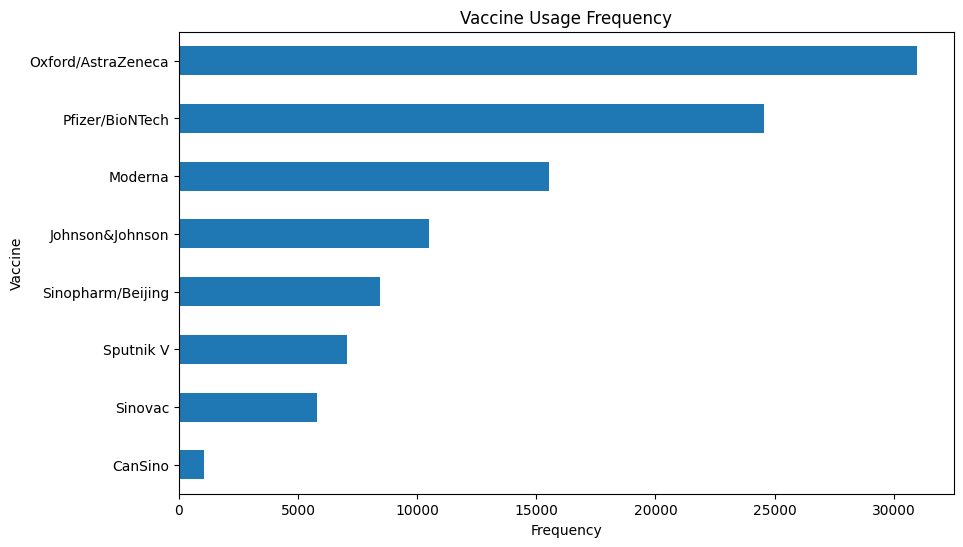

In [57]:
# Plot 4: Vaccine usage frequency
plt.figure(figsize=(10, 6))
vaccine_columns = [
    'Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
    'Pfizer/BioNTech', 'Sinovac', 'CanSino',
    'Sputnik V', 'Sinopharm/Beijing'
]
df[vaccine_columns].sum().sort_values().plot(kind='barh')
plt.title('Vaccine Usage Frequency')
plt.xlabel('Frequency')
plt.ylabel('Vaccine')
plt.show()

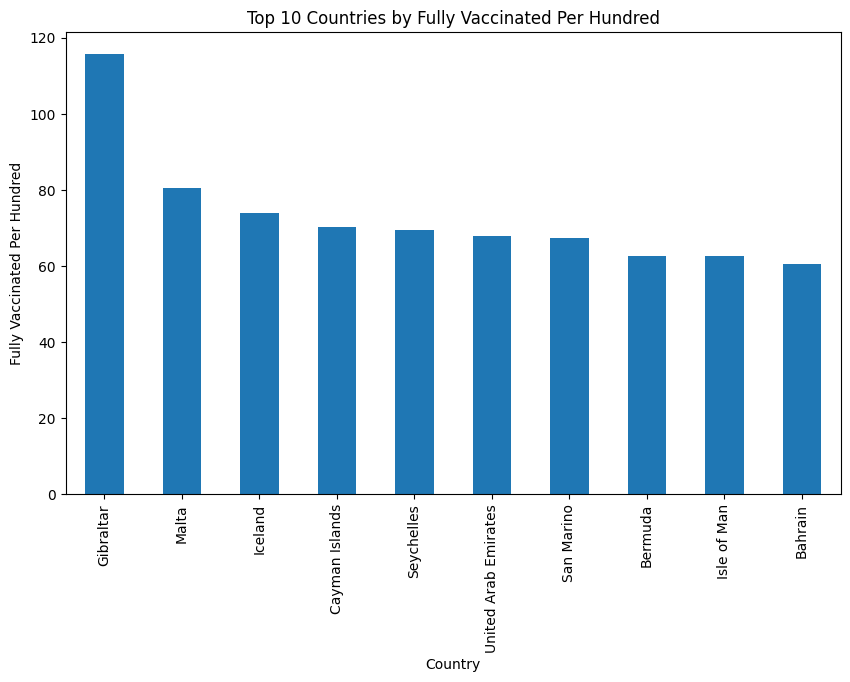

In [58]:
# Plot 5: Fully vaccinated per hundred for top 10 countries
plt.figure(figsize=(10, 6))
df.groupby('country')['people_fully_vaccinated_per_hundred'].max().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Fully Vaccinated Per Hundred')
plt.xlabel('Country')
plt.ylabel('Fully Vaccinated Per Hundred')
plt.show()

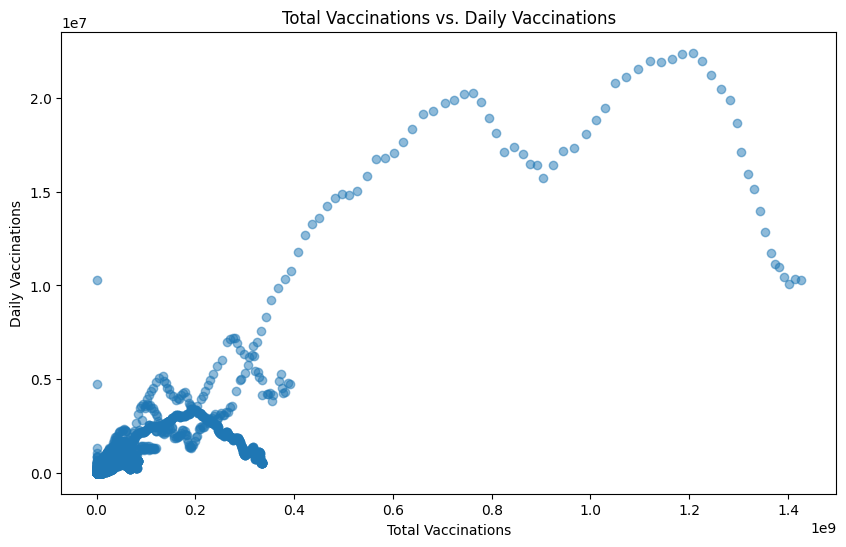

In [59]:
# Plot 6: Total vaccinations vs. daily vaccinations scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_vaccinations'], df['daily_vaccinations'], alpha=0.5)
plt.title('Total Vaccinations vs. Daily Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Daily Vaccinations')
plt.show()

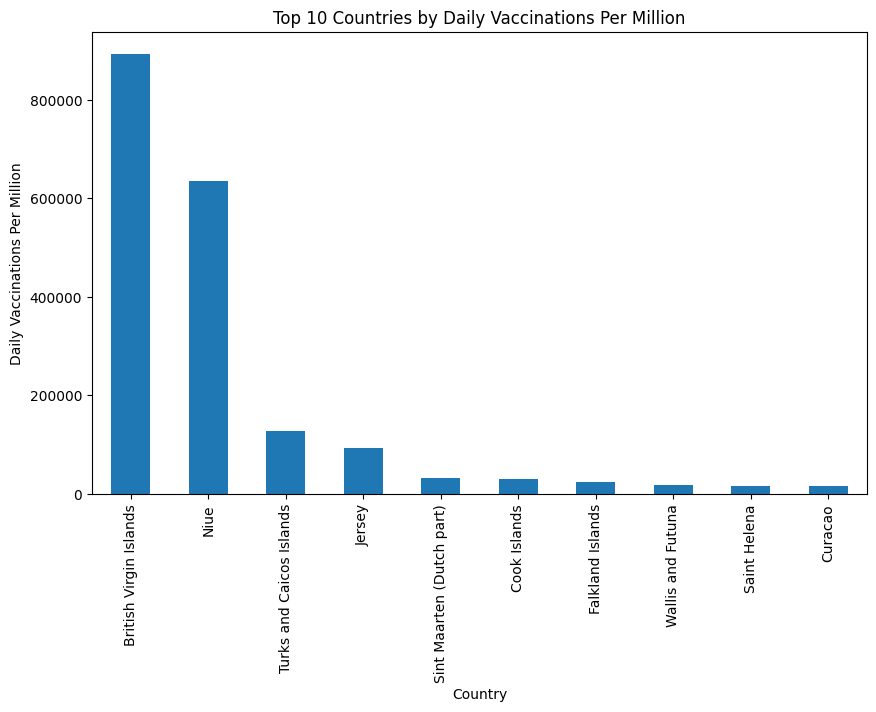

In [60]:
# Plot 7: Daily vaccinations per million for top 10 countries
plt.figure(figsize=(10, 6))
df.groupby('country')['daily_vaccinations_per_million'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Daily Vaccinations Per Million')
plt.xlabel('Country')
plt.ylabel('Daily Vaccinations Per Million')
plt.show()

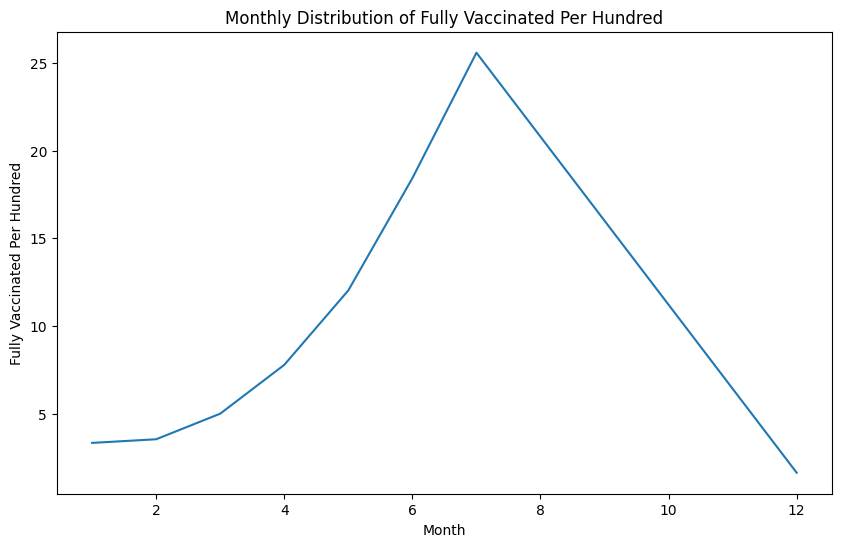

In [61]:
# Plot 8: Monthly distribution of fully vaccinated per hundred
plt.figure(figsize=(10, 6))
df.groupby('month')['people_fully_vaccinated_per_hundred'].mean().plot(kind='line')
plt.title('Monthly Distribution of Fully Vaccinated Per Hundred')
plt.xlabel('Month')
plt.ylabel('Fully Vaccinated Per Hundred')
plt.show()

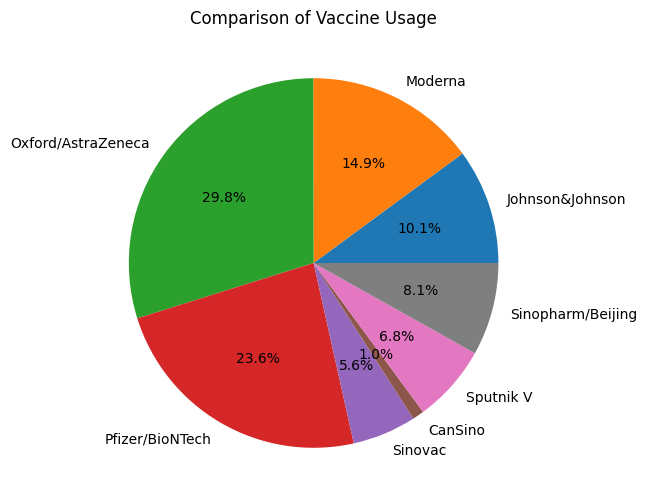

In [62]:
# Plot 9: Comparison of vaccine usage
plt.figure(figsize=(10, 6))
df[vaccine_columns].sum().plot(kind='pie', autopct='%1.1f%%', labels=vaccine_columns)
plt.title('Comparison of Vaccine Usage')
plt.ylabel('')
plt.show()

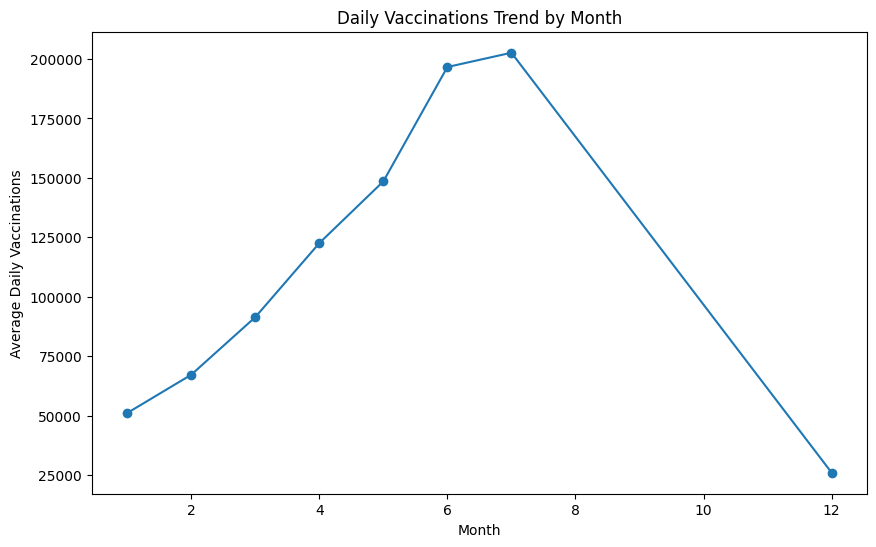

In [63]:
# Plot 10: Daily vaccinations trend by month
plt.figure(figsize=(10, 6))
df.groupby('month')['daily_vaccinations'].mean().plot(kind='line', marker='o')
plt.title('Daily Vaccinations Trend by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Vaccinations')
plt.show()

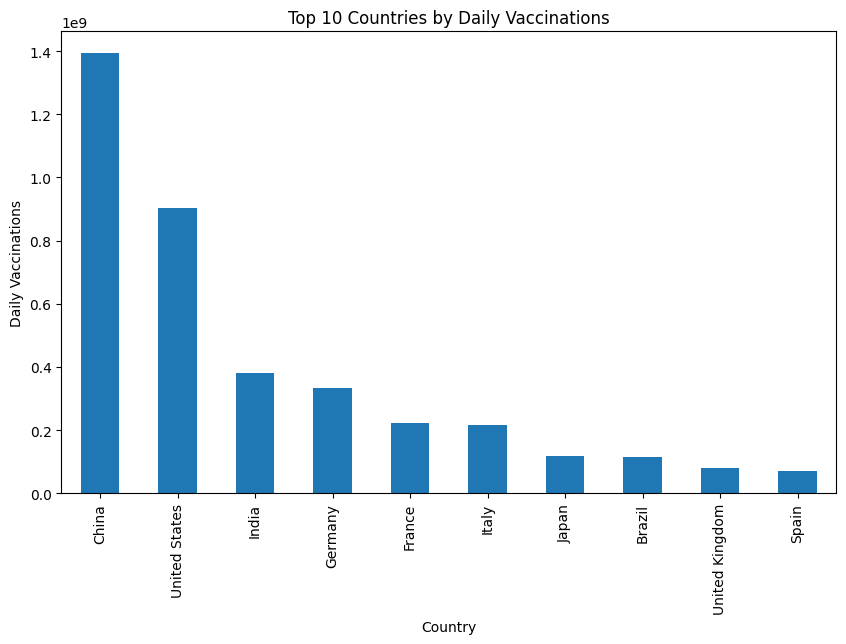

In [64]:
# Plot 11: Top 10 countries by daily vaccinations
plt.figure(figsize=(10, 6))
df.groupby('country')['daily_vaccinations'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Daily Vaccinations')
plt.xlabel('Country')
plt.ylabel('Daily Vaccinations')
plt.show()

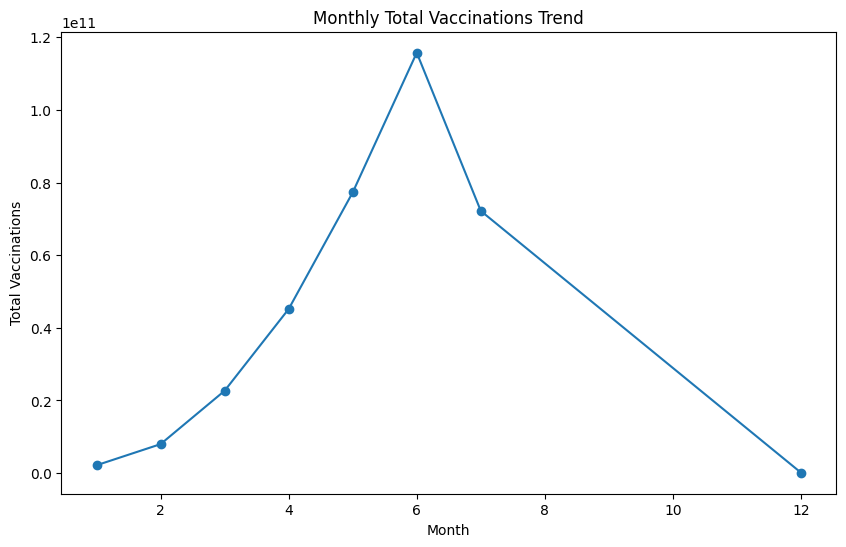

In [65]:
# Plot 12: Monthly total vaccinations trend
plt.figure(figsize=(10, 6))
df.groupby('month')['total_vaccinations'].sum().plot(kind='line', marker='o')
plt.title('Monthly Total Vaccinations Trend')
plt.xlabel('Month')
plt.ylabel('Total Vaccinations')
plt.show()

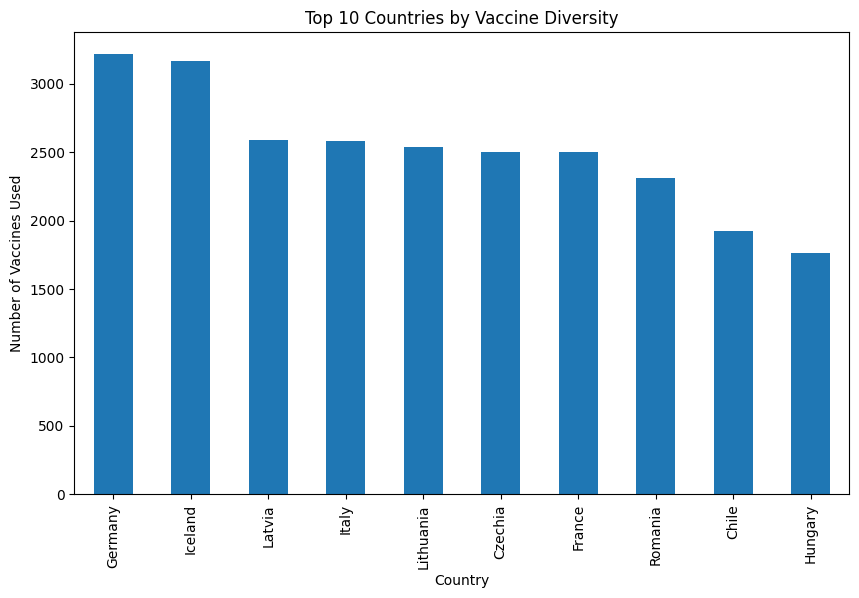

In [66]:
# Plot 13: Vaccine diversity across countries (number of vaccines used)
plt.figure(figsize=(10, 6))
df.groupby('country')[vaccine_columns].sum().sum(axis=1).nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Vaccine Diversity')
plt.xlabel('Country')
plt.ylabel('Number of Vaccines Used')
plt.show()

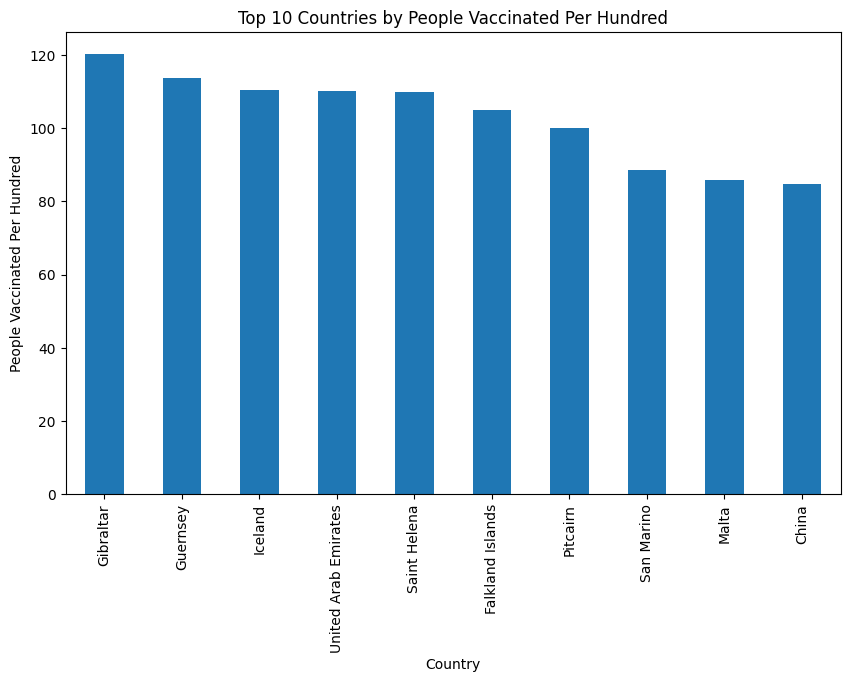

In [67]:
# Plot 14: People vaccinated per hundred for top 10 countries
plt.figure(figsize=(10, 6))
df.groupby('country')['people_vaccinated_per_hundred'].max().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by People Vaccinated Per Hundred')
plt.xlabel('Country')
plt.ylabel('People Vaccinated Per Hundred')
plt.show()

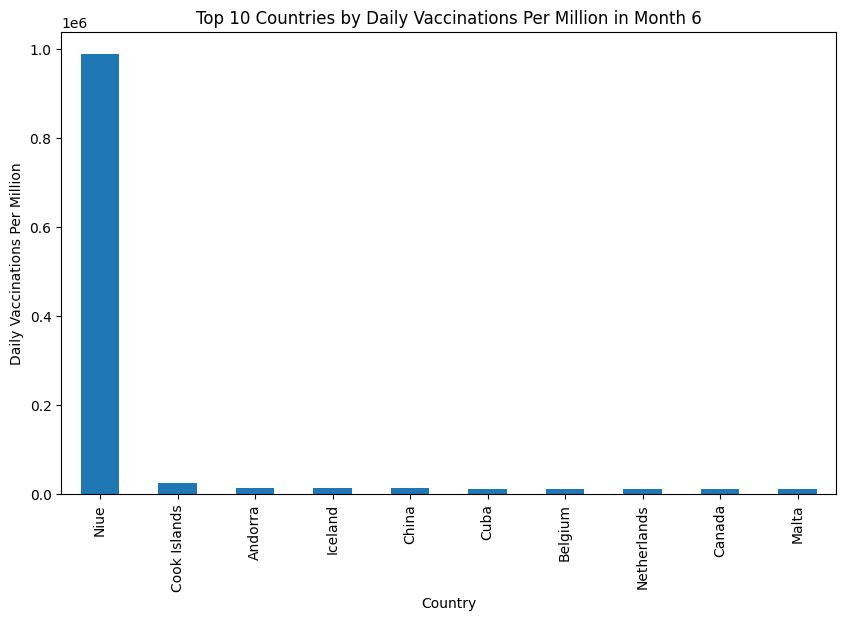

In [68]:
# Plot 15: Daily vaccinations per million for the month with the highest activity
top_month = df.groupby('month')['daily_vaccinations'].sum().idxmax()
plt.figure(figsize=(10, 6))
df[df['month'] == top_month].groupby('country')['daily_vaccinations_per_million'].mean().nlargest(10).plot(kind='bar')
plt.title(f'Top 10 Countries by Daily Vaccinations Per Million in Month {top_month}')
plt.xlabel('Country')
plt.ylabel('Daily Vaccinations Per Million')
plt.show()

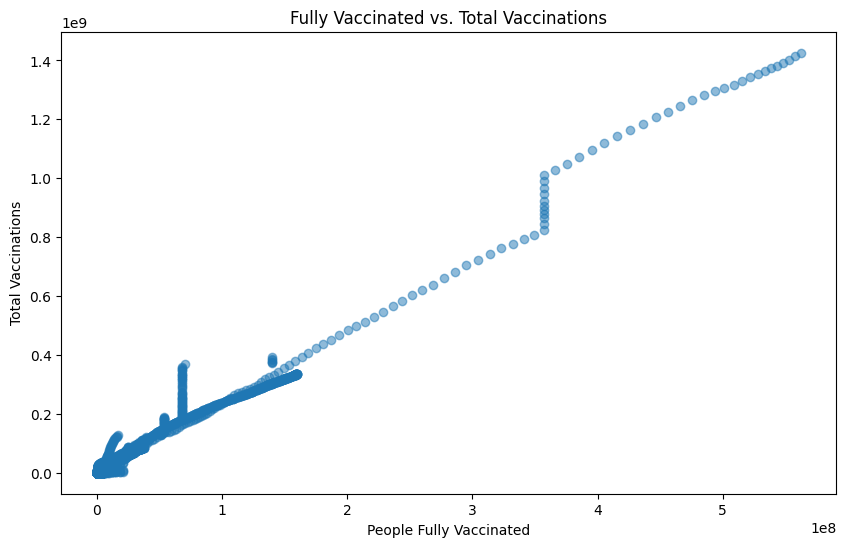

In [69]:
# Plot 16: Fully vaccinated vs. total vaccinations scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['people_fully_vaccinated'], df['total_vaccinations'], alpha=0.5)
plt.title('Fully Vaccinated vs. Total Vaccinations')
plt.xlabel('People Fully Vaccinated')
plt.ylabel('Total Vaccinations')
plt.show()

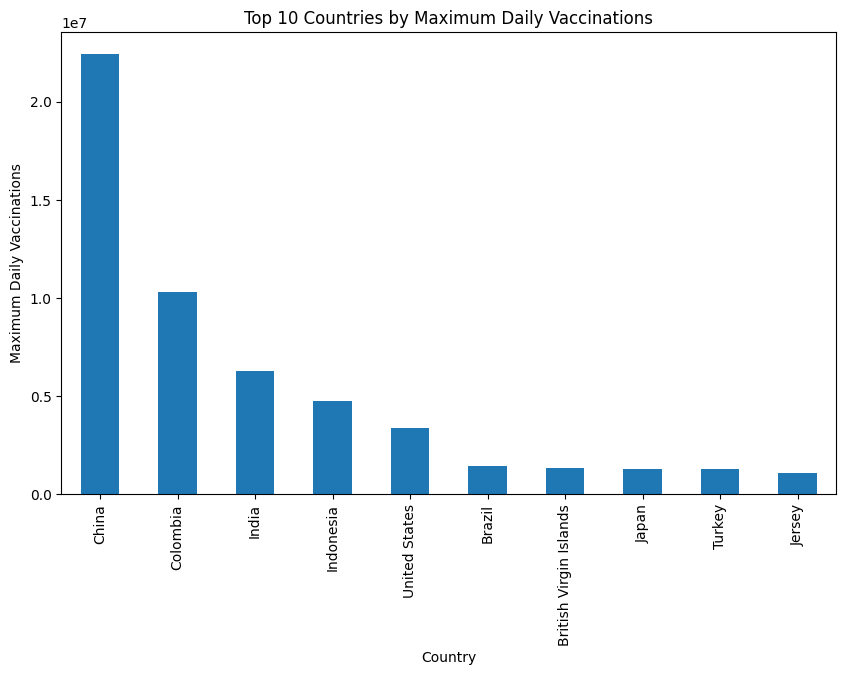

In [70]:
# Plot 17: Country-wise maximum daily vaccinations
plt.figure(figsize=(10, 6))
df.groupby('country')['daily_vaccinations'].max().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Maximum Daily Vaccinations')
plt.xlabel('Country')
plt.ylabel('Maximum Daily Vaccinations')
plt.show()

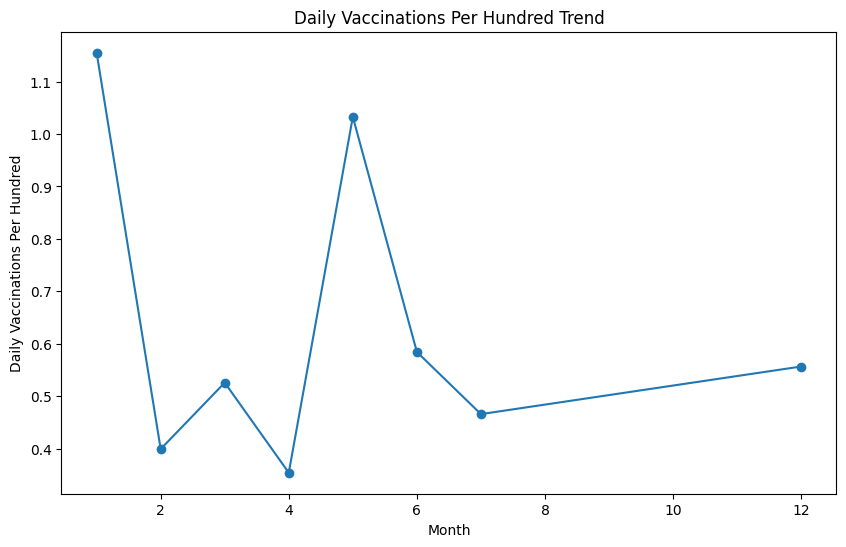

In [71]:
# Plot 18
daily_vaccinations_per_hundred = df.copy()

# Mapping country populations to each row
daily_vaccinations_per_hundred['population'] = daily_vaccinations_per_hundred['country'].map(country_population)

# Calculating daily vaccinations per hundred
daily_vaccinations_per_hundred['daily_vaccinations_per_hundred'] = (
    daily_vaccinations_per_hundred['daily_vaccinations'] / daily_vaccinations_per_hundred['population'] * 100
)

# Grouping by month and plotting
plt.figure(figsize=(10, 6))
daily_vaccinations_per_hundred.groupby('month')['daily_vaccinations_per_hundred'].mean().plot(kind='line', marker='o')
plt.title('Daily Vaccinations Per Hundred Trend')
plt.xlabel('Month')
plt.ylabel('Daily Vaccinations Per Hundred')
plt.show()

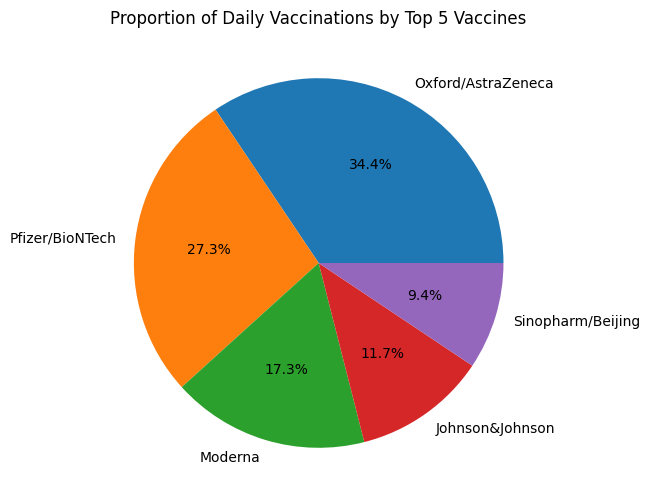

In [73]:
# Plot 19: Proportion of daily vaccinations by top 5 vaccines
plt.figure(figsize=(10, 6))
df[vaccine_columns].sum().nlargest(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Daily Vaccinations by Top 5 Vaccines')
plt.ylabel('')
plt.show()

## Prepare Data for Machine learning

In [74]:
df = df.drop(columns=['country'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   people_vaccinated                    37440 non-null  float64
 1   people_fully_vaccinated              37440 non-null  float64
 2   daily_vaccinations                   37440 non-null  float64
 3   total_vaccinations_per_hundred       37440 non-null  float64
 4   people_vaccinated_per_hundred        37440 non-null  float64
 5   people_fully_vaccinated_per_hundred  37440 non-null  float64
 6   daily_vaccinations_per_million       37440 non-null  float64
 7   total_vaccinations                   37440 non-null  float64
 8   Johnson&Johnson                      37440 non-null  int64  
 9   Moderna                              37440 non-null  int64  
 10  Oxford/AstraZeneca                   37440 non-null  int64  
 11  Pfizer/BioNTech             

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target
X = df.drop(columns=['total_vaccinations'])  # Features
y = df['total_vaccinations']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying StandardScaler to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the shapes of the datasets to confirm
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((29952, 17), (7488, 17), (29952,), (7488,))

## Train your model

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
# Placeholder for results
results = []

In [79]:
# Model 1: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
results.append({
    "Model": "Linear Regression",
    "MSE": mean_squared_error(y_test, y_pred_lr),
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "R2 Score": r2_score(y_test, y_pred_lr)
})

In [80]:
# Model 2: Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)
results.append({
    "Model": "Ridge Regression",
    "MSE": mean_squared_error(y_test, y_pred_ridge),
    "MAE": mean_absolute_error(y_test, y_pred_ridge),
    "R2 Score": r2_score(y_test, y_pred_ridge)
})

In [81]:
# Model 3: Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)
results.append({
    "Model": "Lasso Regression",
    "MSE": mean_squared_error(y_test, y_pred_lasso),
    "MAE": mean_absolute_error(y_test, y_pred_lasso),
    "R2 Score": r2_score(y_test, y_pred_lasso)
})

In [82]:
# Model 4: Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
results.append({
    "Model": "Random Forest",
    "MSE": mean_squared_error(y_test, y_pred_rf),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R2 Score": r2_score(y_test, y_pred_rf)
})

In [83]:
# Model 5: Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train_scaled, y_train)
y_pred_gb = model_gb.predict(X_test_scaled)
results.append({
    "Model": "Gradient Boosting",
    "MSE": mean_squared_error(y_test, y_pred_gb),
    "MAE": mean_absolute_error(y_test, y_pred_gb),
    "R2 Score": r2_score(y_test, y_pred_gb)
})

In [84]:
# Model 6: XGBoost
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)

results.append({
    "Model": "XGBoost",
    "MSE": mean_squared_error(y_test, y_pred_xgb),
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "R2 Score": r2_score(y_test, y_pred_xgb)
})

## Test the model and show the metrics

In [85]:
# Creating a DataFrame for results
results_df = pd.DataFrame(results)

# Highlighting the best model based on R2 Score
best_model = results_df['R2 Score'].idxmax()
results_df.style.apply(lambda x: ['background-color: lightgreen' if i == best_model else '' for i in range(len(x))], axis=0)

,Model,MSE,MAE,R2 Score
0,Linear Regression,13358769626832.568359,1407242.140622,0.995359
1,Ridge Regression,13356997792359.791016,1407276.990598,0.995360
2,Lasso Regression,13358770320790.740234,1407241.965354,0.995359
3,Random Forest,802201173937.083374,113959.264291,0.999721
4,Gradient Boosting,1518675912606.435791,361593.075559,0.999472
5,XGBoost,1446282674930.846191,186126.441373,0.999498


## Save your final model

In [86]:
import joblib

# Save the Random Forest model to a file
joblib.dump(model_rf, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [87]:
# Saving the DataFrame to a CSV file
df.to_csv('cleaned_df_for_modeling.csv', index=False)
print("DataFrame saved as 'cleaned_df_for_modeling.csv'")

DataFrame saved as 'cleaned_df_for_modeling.csv'
